In [1]:
# needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from pandas.plotting import parallel_coordinates

## 1.1 Data Collection

In [2]:
# outputs the value for every decision variable and output variable 
opt_results = pd.read_csv("../outputs/nfe5000_uwf_big/baseline_results_nfe5000_uwf_big.csv").drop(columns="Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,0.052364,0.087187,0.407242,0.107700,0.802398,0.038154,0.072404,0.332198,0.704173,0.159662,...,0.317028,0.341144,0.537682,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,38.610689
1,0.133357,0.374625,0.158202,0.828198,0.253405,0.164434,-0.954813,0.548594,0.257013,0.859088,...,0.000734,0.445793,0.778529,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,937551.290375
2,0.010756,0.440681,0.422296,0.396697,0.670044,0.932155,0.277200,0.159139,-0.706814,0.829693,...,0.097262,0.696940,0.235680,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,550030.820907
3,0.618749,0.910088,0.690701,0.423752,0.017773,0.276404,0.918639,0.679724,-0.272691,0.847347,...,0.645062,0.061787,0.843859,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,550022.640062
4,0.153150,0.120177,0.562174,0.245114,-0.165570,0.048345,0.866991,0.486565,-0.127383,0.522068,...,0.632262,0.795613,0.891455,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,32.783958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.158039,0.705753,0.822987,0.417805,-0.248198,0.998076,0.612591,0.695601,0.464920,0.956899,...,0.372892,0.799483,0.948799,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,537529.374027
487,0.741126,0.510318,0.700846,0.407705,-0.381242,0.314006,-0.326361,0.452992,-0.311207,0.127268,...,0.247653,0.372832,0.119079,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,279187.340128
488,0.148195,0.678486,0.989145,0.557397,-0.376295,0.305259,0.758178,0.755096,0.702720,0.919129,...,0.901966,0.538304,0.893145,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,895884.509641
489,0.173301,0.705731,0.677997,0.410731,-0.248198,0.663731,-0.610142,0.695241,0.448041,0.423992,...,0.374841,0.108499,0.949028,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,291695.494200


## 1.2 Data Cleaning

In [3]:
# splitting the policy and objective dataframe
policies, objectives = opt_results.iloc[:, :-7], opt_results.iloc[:, -7:]

In [4]:
# the policy dataframe with the values for the decision variables 
policies

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163
0,0.052364,0.087187,0.407242,0.107700,0.802398,0.038154,0.072404,0.332198,0.704173,0.159662,...,-0.605810,0.199499,0.990530,0.890809,-0.611673,0.564624,0.085100,0.317028,0.341144,0.537682
1,0.133357,0.374625,0.158202,0.828198,0.253405,0.164434,-0.954813,0.548594,0.257013,0.859088,...,-0.726892,0.639484,-0.749845,0.700583,0.983675,0.884120,0.745254,0.000734,0.445793,0.778529
2,0.010756,0.440681,0.422296,0.396697,0.670044,0.932155,0.277200,0.159139,-0.706814,0.829693,...,0.177416,0.821190,0.651199,0.140704,0.725865,0.153819,0.091582,0.097262,0.696940,0.235680
3,0.618749,0.910088,0.690701,0.423752,0.017773,0.276404,0.918639,0.679724,-0.272691,0.847347,...,0.355045,0.433314,-0.187771,0.851074,-0.308538,0.490387,0.005119,0.645062,0.061787,0.843859
4,0.153150,0.120177,0.562174,0.245114,-0.165570,0.048345,0.866991,0.486565,-0.127383,0.522068,...,0.855954,0.451650,0.638521,0.207154,0.607829,0.707012,0.752862,0.632262,0.795613,0.891455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.158039,0.705753,0.822987,0.417805,-0.248198,0.998076,0.612591,0.695601,0.464920,0.956899,...,-0.700493,0.745495,-0.405410,0.957115,-0.742657,0.832641,0.912888,0.372892,0.799483,0.948799
487,0.741126,0.510318,0.700846,0.407705,-0.381242,0.314006,-0.326361,0.452992,-0.311207,0.127268,...,-0.398689,0.163303,-0.608520,0.327477,-0.526361,0.100093,0.823709,0.247653,0.372832,0.119079
488,0.148195,0.678486,0.989145,0.557397,-0.376295,0.305259,0.758178,0.755096,0.702720,0.919129,...,0.466741,0.591627,0.225055,0.641121,-0.703288,0.710754,0.044155,0.901966,0.538304,0.893145
489,0.173301,0.705731,0.677997,0.410731,-0.248198,0.663731,-0.610142,0.695241,0.448041,0.423992,...,-0.689726,0.737790,-0.405410,0.957115,0.680839,0.832641,0.924883,0.374841,0.108499,0.949028


In [5]:
# the objectives dataframe 
df_objectives = objectives.copy()
df_objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,38.610689
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,937551.290375
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,550030.820907
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,550022.640062
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,32.783958
...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,537529.374027
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,279187.340128
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,895884.509641
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,291695.494200


## 1.3 Exploratory Data Analysis

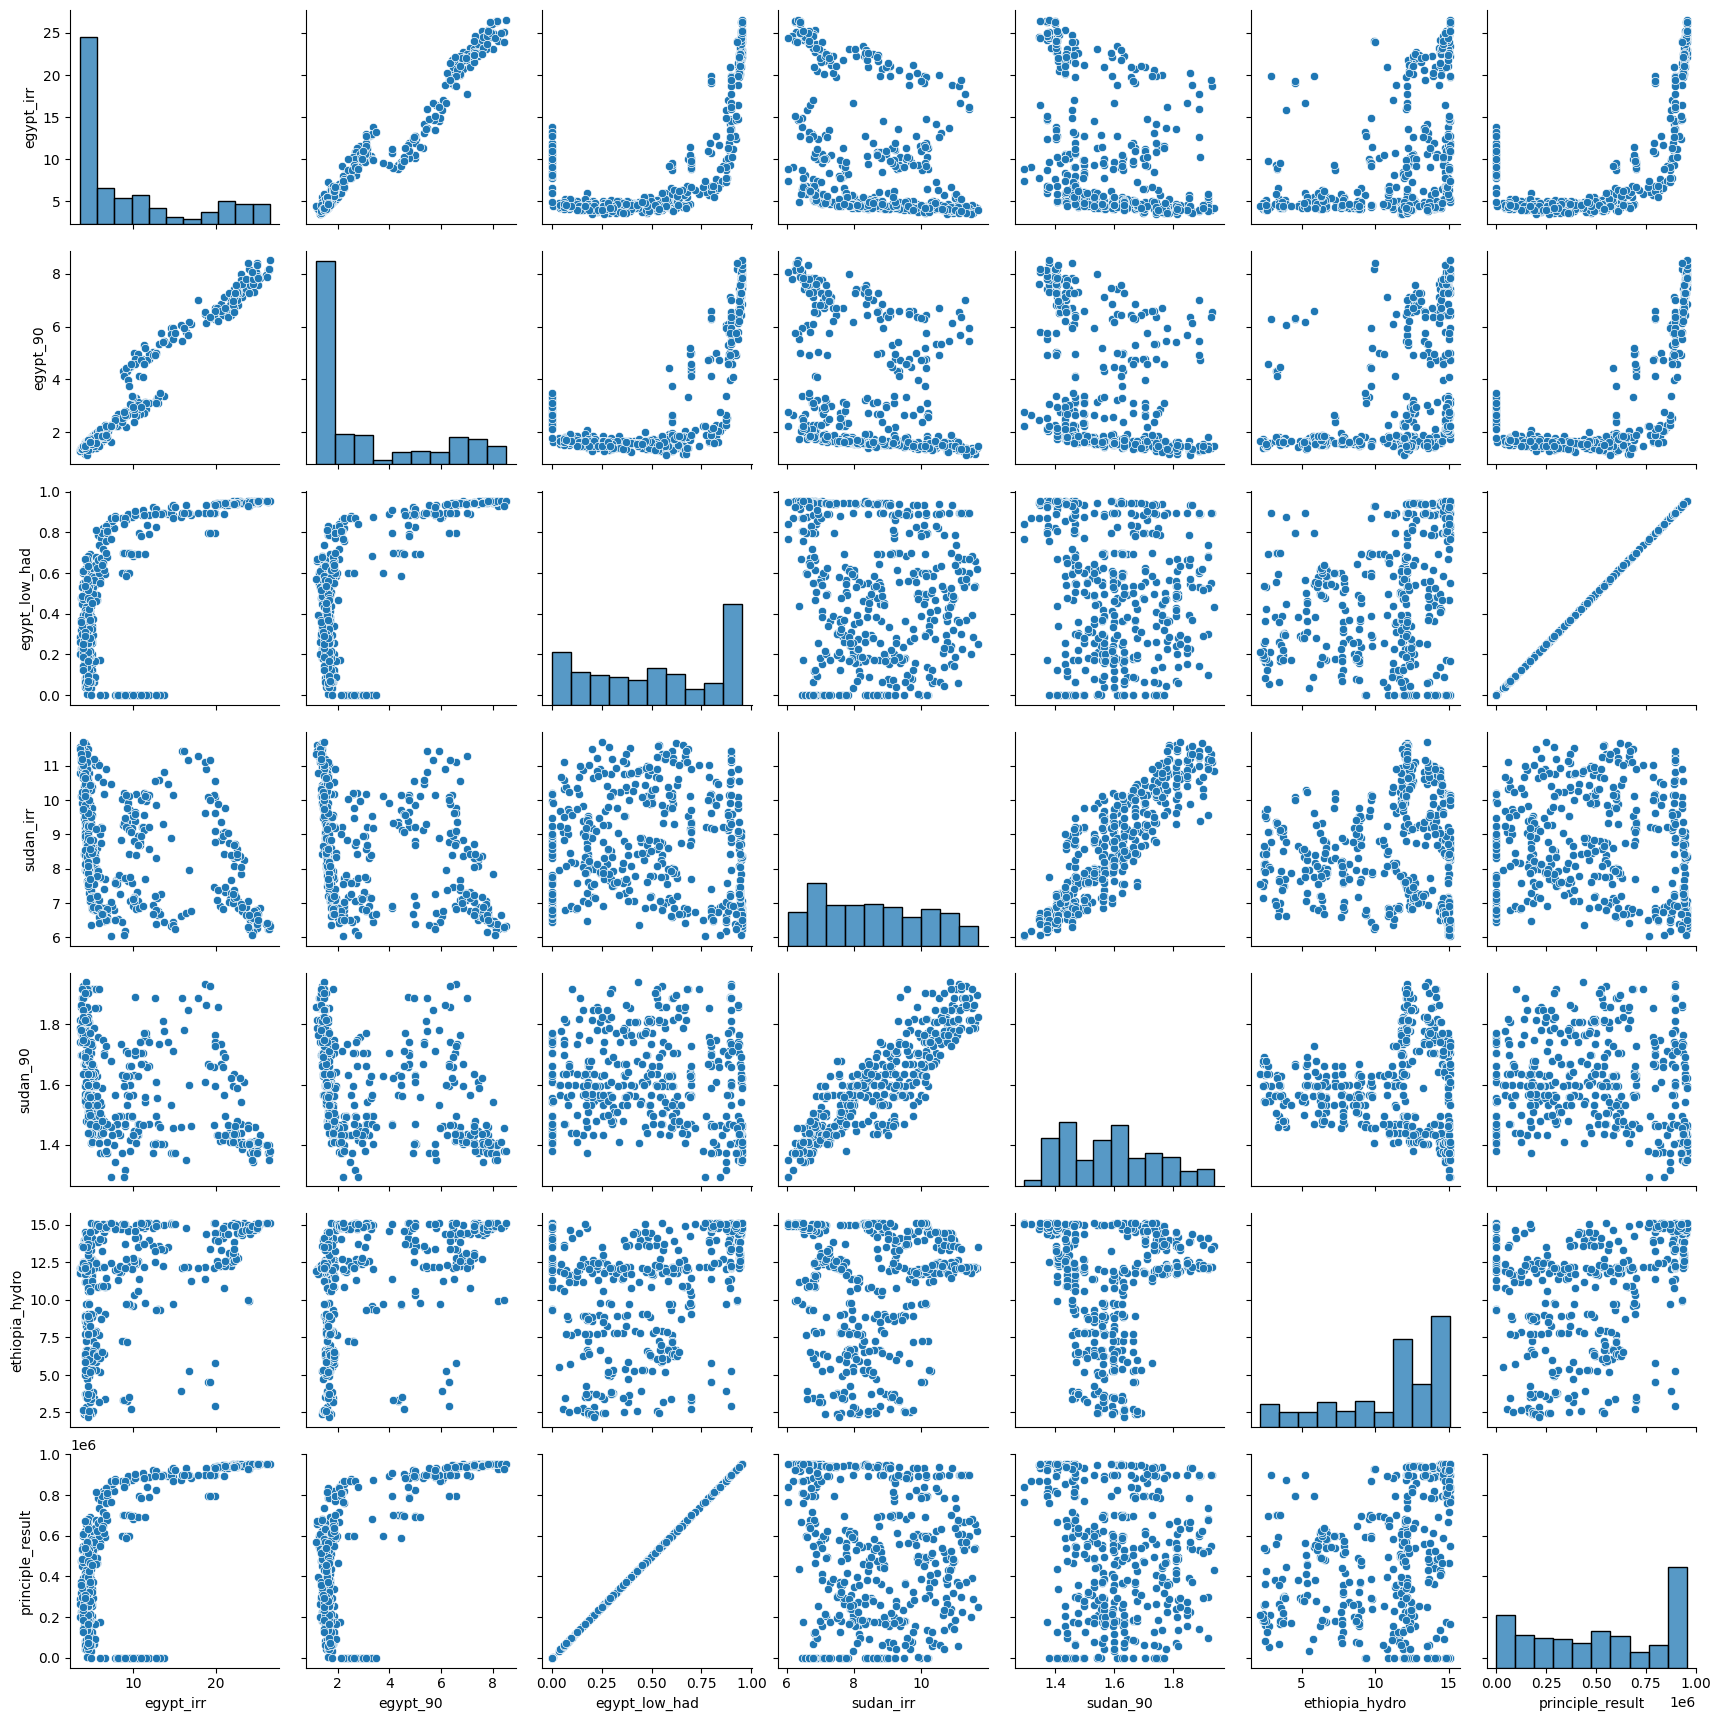

In [6]:
# a pairplot showing the relationships between the objective variables 
sns.pairplot(objectives)

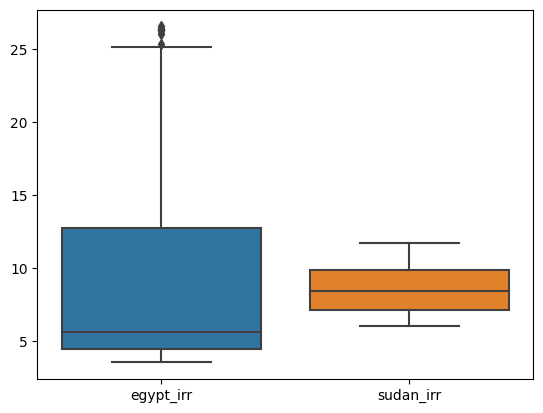

In [7]:
# Create the boxplot
sns.boxplot(data=df_objectives[['egypt_irr','sudan_irr']])

# Display the plot
plt.show()

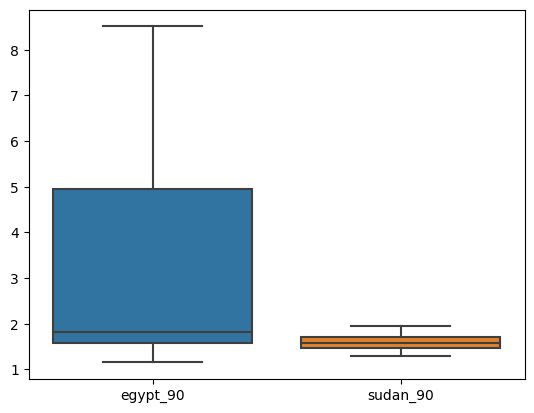

In [8]:
# Create the boxplot
sns.boxplot(data=df_objectives[['egypt_90','sudan_90']])

# Display the plot
plt.show()

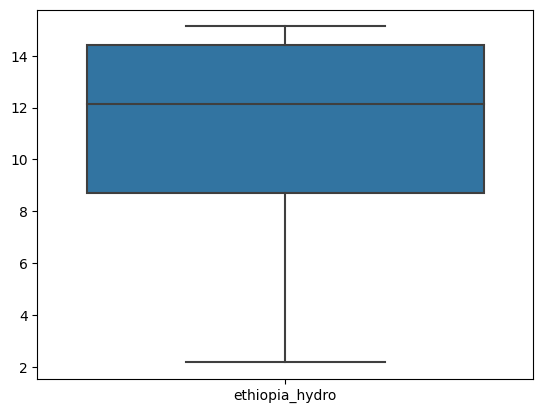

In [9]:
# Create the boxplot
sns.boxplot(data=df_objectives[['ethiopia_hydro']])

# Display the plot
plt.show()

### Checking Objective Ranges for Correct Epsilon Values

In [10]:
# calculating the coefficient of variation for the objectives
cv_results = (df_objectives.std(numeric_only=True) / df_objectives.mean(numeric_only=True)) * 100
print(cv_results)

egypt_irr           73.219283
egypt_90            71.190097
egypt_low_had       63.581924
sudan_irr           18.011926
sudan_90             9.690112
ethiopia_hydro      34.286233
principle_result    63.579278
dtype: float64


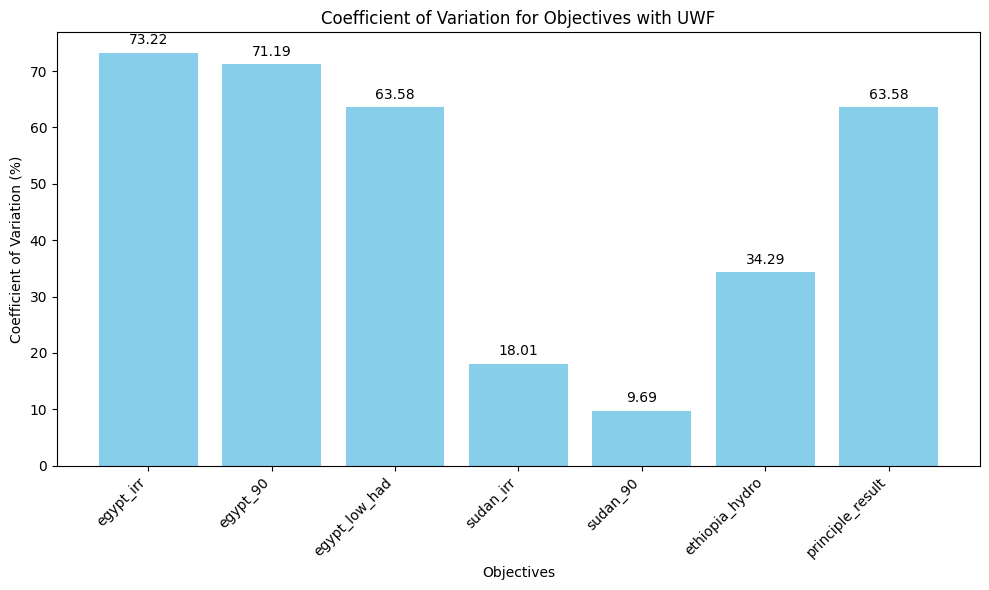

In [11]:
# Create a bar plot for CV results
plt.figure(figsize=(10, 6))
plt.bar(cv_results.index, cv_results.values, color='skyblue')
plt.xlabel('Objectives')
plt.ylabel('Coefficient of Variation (%)')
plt.title('Coefficient of Variation for Objectives with UWF')
plt.xticks(rotation=45, ha='right')

# Adding labels above each bar
for index, value in enumerate(cv_results.values):
    plt.text(index, value + 1, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# a list of the objective names 
obj = list(objectives.columns)
obj

['egypt_irr',
 'egypt_90',
 'egypt_low_had',
 'sudan_irr',
 'sudan_90',
 'ethiopia_hydro',
 'principle_result']

##

## 2.1 Best Solutions for Objectives

In [13]:
def get_best_solutions(dataframe, objective_directions):
    """
    Get the index of the best performing solution for each objective based on the specified objective directions.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the objective values.
        objective_directions (dict): A dictionary mapping each objective column name to its direction ('min' or 'max').

    Returns:
        dict: A dictionary mapping each objective column name to the index of the best performing solution.

    """
    if not set(objective_directions.values()).issubset({'min', 'max'}):
        raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

    best_solutions = {}

    for column, direction in objective_directions.items():
        if direction == 'max':
            best_index = dataframe[column].idxmax()
        elif direction == 'min':
            best_index = dataframe[column].idxmin()

        best_solutions[column] = best_index

    return best_solutions

In [14]:
# the direction at which the objectives are optimized are put in a dictionary
directions = {'egypt_irr': 'min', 'egypt_90': 'min', 'egypt_low_had': 'min', 'sudan_irr': 'min', 'sudan_90': 'min',
       'ethiopia_hydro': 'max'}

In [15]:
best_solutions = get_best_solutions(df_objectives, directions)
print(best_solutions)

{'egypt_irr': 361, 'egypt_90': 451, 'egypt_low_had': 0, 'sudan_irr': 450, 'sudan_90': 450, 'ethiopia_hydro': 397}


In [16]:
def create_global_variables(best_obj_indices, policies):
    """
    Create individual variables dynamically using a loop.

    Parameters:
        best_obj_indices (dict): A dictionary containing the objective names as keys and their
                                 corresponding best value indices as values.
        policies (DataFrame): The DataFrame containing the data.

    Returns:
        list: A list of the names of the created global variables.
    """
    created_global_variable_names = []
    created_global_variables = []
    merged_keys_dict = {}

    for obj_name, obj_indices in best_obj_indices.items():
        if not isinstance(obj_indices, (list, tuple)):
            obj_indices = [obj_indices]  # Convert to list if it's a single index
        value = tuple(obj_indices)
        if value in merged_keys_dict:
            merged_keys_dict[value].append(obj_name)
        else:
            merged_keys_dict[value] = [obj_name]

    for value, obj_names in merged_keys_dict.items():
        # Check if the indices are unique for the merged keys
        if len(obj_names) == 1:
            obj_name = obj_names[0]
            global_variable_name = f"best_{obj_name}"
            globals()[global_variable_name] = best_obj_indices[obj_name]
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])
        else:
            # If the indices are not unique, merge the key strings
            merged_key_string = "_".join(obj_names)
            global_variable_name = f"best_{merged_key_string}"
            globals()[global_variable_name] = value
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])

    return created_global_variable_names, created_global_variables

In [17]:
created_vars_names, created_vars = create_global_variables(best_solutions, df_objectives)

In [18]:
# # to create the parallel coordinates plot, every solution is classified based on the objectives
# df_objectives['class_obj'] = 'general'

# for column, best_index in best_solutions.items():
#     if df_objectives.at[best_index, 'class_obj'] == 'general':
#         df_objectives.at[best_index, 'class_obj'] = 'best_' + str(column)
#     else:
#         df_objectives.at[best_index, 'class_obj'] += ' and ' + str(column)
# df_objectives

In [21]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    df_objectives,
    created_vars,
    created_vars_names,
        names_display=[
        "Egypt Irr. Deficit",
        "Egypt 90$^{th}$ Irr. Deficit",
        "Egypt Low HAD",
        "Sudan Irr. Deficit",
        "Sudan 90$^{th}$ Irr. Deficit",
        "Ethiopia Hydropower",
        "Principle Result"
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-"],
    directions=["min", "min", "min", "min", "min", "max", "max"],
)
plt.show()

NameError: name 'norm_df' is not defined

In [ ]:
# def normalize_dataframe(df: pd.DataFrame, objective_directions: dict, inplace: bool = False):
#     """
#     Normalize the specified columns of a DataFrame based on objective directions.

#     Args:
#         df (pd.DataFrame): The input DataFrame to be normalized.
#         objective_directions (dict): A dictionary specifying the objective direction for each column.
#             Keys should be column names, and values should be either 'min' or 'max'.
#         inplace (bool, optional): Flag indicating whether to modify the DataFrame in-place or return a copy.
#             Defaults to False.

#     Returns:
#         pd.DataFrame: The normalized DataFrame.

#     Raises:
#         ValueError: If an invalid objective direction is specified.

#     """
#     if not set(objective_directions.values()).issubset({'min', 'max'}):
#         raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

#     normalized_df = df.copy() if not inplace else df

#     for column in df.columns:
#         if column in objective_directions:
#             direction = objective_directions[column]
#             values = df[column]

#             if direction == 'max':
#                 normalized_values = (values - values.min()) / (values.max() - values.min())
#             else:  # direction == 'min'
#                 normalized_values = (values.max() - values) / (values.max() - values.min())

#             normalized_df[column] = normalized_values

#     return normalized_df


In [ ]:
# # the objectives dataframe is normalized
# df_obj_norm = normalize_dataframe(df_objectives, directions)
# df_obj_norm

In [ ]:
# # a parallel coordinates plot of the normalized objective values for every solution
# plot_parallel_coordinates(df_obj_norm, 'class_obj', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values.')

In [ ]:
# def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
#     """
#     Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

#     The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
#     of the standard deviation to the mean. It provides a standardized measure of dispersion.

#     Args:
#         dataframe (pd.DataFrame): The input DataFrame.
#         columns (list): A list of column names for which to calculate the coefficient of variation.

#     Returns:
#         pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

#     """
#     cov_dataframe = dataframe.copy()

#     # Calculate the standard deviation for selected columns
#     std_deviation = cov_dataframe[columns].std()

#     # Calculate the mean for selected columns
#     mean = cov_dataframe[columns].mean()

#     # Calculate the coefficient of variation for selected columns
#     cov_dataframe[columns] = (cov_dataframe[columns] - mean) / std_deviation

#     return cov_dataframe


In [ ]:
# # the objectives dataframe with their values replaced by their coefficient of variation
# df_obj_cov = calculate_coefficient_of_variation(df_objectives, obj)
# df_obj_cov

In [ ]:
# plot_parallel_coordinates(df_obj_cov, 'class_obj', 'Objectives', 'Coefficient of variation', 'Parallel coordinates plot of coefficient of variation values.')

## 2.2 Best Solutions for Principles

In [ ]:
df_objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,38.610689
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,937551.290375
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,550030.820907
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,550022.640062
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,32.783958
...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,537529.374027
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,279187.340128
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,895884.509641
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,291695.494200


In [ ]:
df_objectives = df_objectives.drop(columns="principle_result")
df_objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820
...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087


In [ ]:
def calculate_zscore_df(dataframe: pd.DataFrame, columns: list):
    """
    Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

    The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
    of the standard deviation to the mean. It provides a standardized measure of dispersion.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names for which to calculate the coefficient of variation.

    Returns:
        pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

    """
    cov_dataframe = dataframe.copy()

    # Calculate the standard deviation for selected columns
    std_deviation = cov_dataframe[columns].std()

    # Calculate the mean for selected columns
    mean = cov_dataframe[columns].mean()

    # Calculate the coefficient of variation for selected columns
    cov_dataframe[columns] = (cov_dataframe[columns] - mean) / std_deviation

    return cov_dataframe

In [ ]:
df_objectives_norm = calculate_zscore_df(df_objectives, df_objectives.columns)

### 2.2.1 Calculating the Utilitarian Welfare Function

In [ ]:
def calculate_utilitarian_welfare(refSet, columns):
    """
    Calculates the utilitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the utilitarian welfare.

    Returns:
        pandas.DataFrame: DataFrame with the utilitarian welfare scores for each policy.
    """
    uwf = refSet[columns].sum(axis=1)
    refSet['utilitarian_welfare'] = uwf
    return refSet

### 2.2.2 Calculating the SWF

In [ ]:
def calculate_sufficitarian_welfare(refSet, columns, thresholds):
    """
    Calculates the sufficitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the sufficitarian welfare.
        thresholds (dict): Dictionary containing the threshold values for each column.

    Returns:
        pandas.DataFrame: DataFrame with the 'Sufficitarian Welfare' column added to the original reference set.
    """
    swf_scores = []

    for _, row in refSet.iterrows():
        swf_score = 0

        # Iterate over each column in the row
        for column in columns:
            value = row[column]
            threshold = thresholds[column]

            # Check if the value is smaller than the threshold
            if value < threshold:
                swf_score += value / threshold
            else:
                swf_score += 1

        swf_scores.append(swf_score)

    # Create a new DataFrame with the sufficitarian welfare scores
    swf_df = pd.DataFrame({'sufficitarian_welfare': swf_scores})

    # Add the 'Sufficitarian Welfare' column to the original reference set
    refSet['sufficitarian_welfare'] = swf_df['sufficitarian_welfare']

    return refSet

### 2.2.3 Calculating the PWF

In [ ]:
def calculate_pw(refSet, columns, origins, gamma):
    """
    Calculates the Prioritarian Welfare (PW) for each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Prioritarian Welfare.
        origins (dict): Dictionary containing the reference point for each column.
        gamma (float): The parameter that determines the degree of prioritarianism.

    Returns:
        pandas.DataFrame: DataFrame with the added Prioritarian Welfare column.
    """
    pw_scores = []

    for _, row in refSet.iterrows():
        pw_score = 0

        # Iterate over each column in the row
        for column in columns:
            u_ij = row[column]
            u_0j = origins[column]

            # Calculate the Prioritarian Welfare for the specific column and add it to the score
            if gamma != 1:
                if u_ij >= 0:
                    pw_score += ((u_ij - u_0j) ** gamma - 1) / (1 - gamma)
                else:
                    pw_score += -(abs(u_ij - u_0j) ** gamma - 1) / (1 - gamma)

            else:
                pw_score += np.log(u_ij - u_0j)

        pw_scores.append(pw_score)

    # Create a new DataFrame with the Prioritarian Welfare scores
    pw_df = pd.DataFrame({'prioritarian_welfare': pw_scores})

    # Add the 'Prioritarian Welfare' column to the original reference set
    refSet['prioritarian_welfare'] = pw_df['prioritarian_welfare']

    return refSet

### 2.2.4 Calculating the Gini Coefficient 

In [ ]:
def calculate_gini_index(refSet, columns):
    """
    Calculates the Gini index of each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Gini index.

    Returns:
        pandas.DataFrame: DataFrame with the added Gini index column.
    """
    mean_x = refSet[columns].mean(axis=1)
    denominator = 2 * mean_x * len(columns)**2

    numerator = refSet[columns].sub(mean_x, axis='rows').abs().sum(axis=1)

    gini_index = numerator / denominator
    refSet['gini_index'] = gini_index

    return refSet

### 2.2.5 showing the results

In [ ]:
df_uwf = calculate_utilitarian_welfare(df_objectives, df_objectives.columns)
df_uwf

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,utilitarian_welfare
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,39.610689
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,53.227875
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,32.370907
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,24.190062
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,33.783958
...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,30.911527
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,21.952628
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,53.072141
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,30.119200


In [ ]:
# thresholds = {}
# for column in objectives.columns:
#     threshold = df_objectives[column].quantile(0.7)  # The threshold value for 70% quantile
#     thresholds[column] = threshold
# # thresholds['egypt_irr'] = ?
# # thresholds['egypt_90'] = ?
# # thresholds['egypt_low_had'] = ?
# # thresholds['sudan_irr'] = ?
# # thresholds['sudan_90'] = ?
# # thresholds['ethiopia_hydro'] = ?
# print(thresholds)

{'egypt_irr': 10.707637612360177, 'egypt_90': 3.351307737533914, 'egypt_low_had': 0.7958333333333333, 'sudan_irr': 9.5407750323657, 'sudan_90': 1.6698657292611403, 'ethiopia_hydro': 13.745682942592396, 'principle_result': 795873.9302404113}


In [ ]:
# df_swf = calculate_sufficitarian_welfare(df_uwf, objectives, thresholds)
# df_swf

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result,utilitarian_welfare,sufficitarian_welfare
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,38.610689,78.221378,4.598055
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,937551.290375,937604.518251,6.947992
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,550030.820907,550063.191814,5.205651
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,550022.640062,550046.830124,4.670340
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,32.783958,66.567917,4.285522
...,...,...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,537529.374027,537560.285553,5.084701
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,279187.340128,279209.292755,3.808160
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,895884.509641,895937.581782,6.972311
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,291695.494200,291725.613399,4.445235


In [ ]:
origins = {}
origins['egypt_irr'] = 0
origins['egypt_90'] = 0
origins['egypt_low_had'] = 0
origins['sudan_irr'] = 0
origins['sudan_90'] = 0
origins['ethiopia_hydro'] = 0
print(origins)

{'egypt_irr': 0, 'egypt_90': 0, 'egypt_low_had': 0, 'sudan_irr': 0, 'sudan_90': 0, 'ethiopia_hydro': 0}


In [ ]:
print(objectives)

     egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro  \
0    12.784162  3.179042       0.000000   7.183713  1.496968       14.966803   
1    20.898984  6.536345       0.937500   9.044580  1.706105       14.104362   
2     4.952912  1.728381       0.550000   8.414757  1.608378       15.116479   
3     5.054927  1.613892       0.550000   8.741858  1.557762        6.671624   
4     9.318004  2.672591       0.000000   7.636768  1.496776       12.659820   
..         ...       ...            ...        ...       ...             ...   
486   4.153911  1.526962       0.537500  10.639845  1.814946       12.238362   
487   4.776388  1.630791       0.279167   8.578284  1.498239        5.189759   
488  19.352015  6.353171       0.895833  11.178347  1.927701       13.365073   
489   4.211005  1.465273       0.291667  10.127988  1.903181       12.120087   
490   4.745321  1.628917       0.370833   7.710237  1.557762        8.226763   

     principle_result  
0           38.

In [ ]:
df_pwf = calculate_pw(df_uwf, origins.keys(), origins, gamma=0.95)
df_pwf

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,utilitarian_welfare,prioritarian_welfare
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,39.610689,586.089824
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,53.227875,819.248203
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,32.370907,463.058076
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,24.190062,324.779161
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,33.783958,487.896258
...,...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,30.911527,438.615374
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,21.952628,285.164345
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,53.072141,817.867164
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,30.119200,424.582291


In [ ]:
df_gini = calculate_gini_index(df_pwf, origins.keys())
df_gini

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,utilitarian_welfare,prioritarian_welfare,gini_index
0,12.784162,3.179042,0.000000,7.183713,1.496968,14.966803,39.610689,586.089824,0.063658
1,20.898984,6.536345,0.937500,9.044580,1.706105,14.104362,53.227875,819.248203,0.054589
2,4.952912,1.728381,0.550000,8.414757,1.608378,15.116479,32.370907,463.058076,0.065599
3,5.054927,1.613892,0.550000,8.741858,1.557762,6.671624,24.190062,324.779161,0.057692
4,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,33.783958,487.896258,0.062765
...,...,...,...,...,...,...,...,...,...
486,4.153911,1.526962,0.537500,10.639845,1.814946,12.238362,30.911527,438.615374,0.067798
487,4.776388,1.630791,0.279167,8.578284,1.498239,5.189759,21.952628,285.164345,0.057458
488,19.352015,6.353171,0.895833,11.178347,1.927701,13.365073,53.072141,817.867164,0.054515
489,4.211005,1.465273,0.291667,10.127988,1.903181,12.120087,30.119200,424.582291,0.067556


In [ ]:
# the direction at which the objectives are optimized are put in a dictionary
# directions_principles = {'utilitarian_welfare': 'max', 'sufficitarian_welfare': 'max', 'prioritarian_welfare': 'max', 'gini_index': 'min'}
directions_principles = {'utilitarian_welfare': 'max', 'prioritarian_welfare': 'max', 'gini_index': 'min'}

In [ ]:
best_solutions_principles = get_best_solutions(df_gini, directions_principles)

In [ ]:
created_vars_names, created_vars = create_global_variables(best_solutions_principles, df_gini)

In [ ]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    df_gini[["utilitarian_welfare", "prioritarian_welfare", "gini_index"]],
    created_vars,
    created_vars_names,
        names_display=[
        "UWF",
        "PWF",
        "Gini",
    ],
    units=["-", "-", "%", "-"],
    directions=["max", "max", "min"],
)
plt.show()

NameError: name 'df_gini' is not defined

In [ ]:
# to create the parallel coordinates plot later, every solution is classified based on the objectives
df_gini['class_principle'] = 'general'

for column, best_index in best_solutions_principles.items():
    if df_gini.at[best_index, 'class_principle'] == 'general':
        df_gini.at[best_index, 'class_principle'] = 'best_' + str(column)
    else:
        df_gini.at[best_index, 'class_principle'] += '_and_' + str(column)
df_gini

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,class_obj,utilitarian_welfare,sufficitarian_welfare,prioritarian_welfare,gini_index,class_principle
0,17.698853,4.438602,0.000000,0.085951,0.000000,14.952997,best_egypt_low_had and sudan_90,37.176403,4.692500,-141.097582+27.136912j,0.090827,general
1,10.580375,3.075155,0.000000,0.124118,0.000000,9.424000,general,23.203647,3.989196,-383.147960+50.171597j,0.088131,general
2,13.779335,5.029973,0.937500,0.518966,0.000000,15.038974,general,35.304747,5.856801,-170.804008+32.074567j,0.080490,best_sufficitarian_welfare_and_gini_index
3,7.608407,2.418017,0.054167,0.124118,0.000000,9.712743,best_egypt_irr,19.917452,4.674910,-437.843182+59.657397j,0.089386,general
4,13.726523,3.659696,0.000000,0.011488,0.000000,11.700629,general,29.098336,3.563106,-281.415253+40.458763j,0.090084,general
5,13.026376,4.285742,0.954167,0.000000,0.000000,11.903136,best_sudan_irr,30.169421,4.582528,-260.678828+37.735611j,0.082164,general
6,13.856823,3.732484,0.000000,0.000000,0.000000,14.756991,general,32.346298,3.700894,-225.245050+39.933800j,0.091879,general
7,22.739204,6.301807,0.958333,0.035171,0.000000,14.857396,general,44.891911,5.283369,6.0976560+9.6454760j,0.084026,best_utilitarian_welfare_and_prioritarian_welfare
8,17.502397,4.559880,0.000000,0.624280,0.132597,15.056721,best_ethiopia_hydro,37.875875,5.000000,-128.110021+25.360506j,0.087716,general
9,18.201043,4.703832,0.000000,0.075908,0.000000,14.934244,general,37.915027,4.611580,-127.812598+24.982025j,0.090100,general


c:\Users\meron\anaconda3\envs\Master_thesis\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


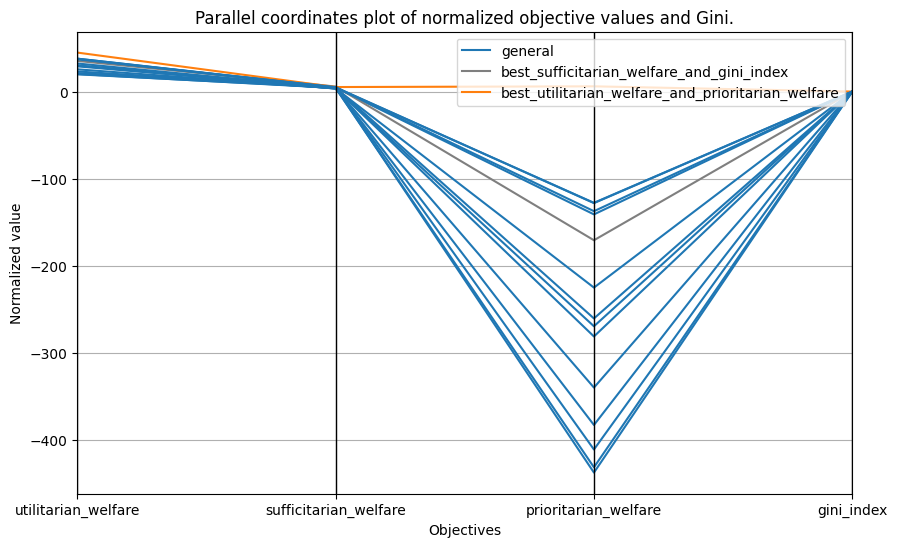

In [ ]:
plot_parallel_coordinates(df_gini[["class_principle", "utilitarian_welfare", "sufficitarian_welfare", "prioritarian_welfare", "gini_index"]], 'class_principle', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values and Gini.')